In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("bmh")
import pandas_datareader as pdr
from pandas.plotting import scatter_matrix

C:\Users\PC\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [8]:
'''
Multiple linear regression of stock indices.
Target: To analyse if there is a relationship between different indices - US with EU,AUS,Asia.
The relationship may be used to predict the US stock price changes and set up apprpriate trading strategy.
This file contains the following steps:
1. Data collection yahoo finance
2. Data preparation
3. Data analysis
4. Data prediction
5. Evaluation
'''


'\nMultiple linear regression of stock indices.\nTarget: To analyse if there is a relationship between different indices - US with EU,AUS,Asia.\nThe relationship may be used to predict the US stock price changes and set up apprpriate trading strategy.\nThis file contains the following steps:\n1. Data collection yahoo finance\n2. Data preparation\n3. Data analysis\n4. Data prediction\n5. Evaluation\n'

In [2]:
#1.Data collection
aord=pdr.get_data_yahoo('^AORD', start = "2009-01-01", end = "2020-04-30")
nikkei=pdr.get_data_yahoo('^N225', start = "2009-01-01", end = "2020-04-30")
hsi=pdr.get_data_yahoo('^HSI', start = "2009-01-01", end = "2020-04-30")
daxi=pdr.get_data_yahoo('^GDAXI', start = "2009-01-01", end = "2020-04-30")
cac40=pdr.get_data_yahoo('^FCHI', start = "2009-01-01", end = "2020-04-30")
sp500=pdr.get_data_yahoo('^GSPC', start = "2009-01-01", end = "2020-04-30")
dji=pdr.get_data_yahoo('^DJI', start = "2009-01-01", end = "2020-04-30")
nasdaq=pdr.get_data_yahoo('^IXIC', start = "2009-01-01", end = "2020-04-30")
spy=pdr.get_data_yahoo('SPY', start = "2009-01-01", end = "2020-04-30")

![](IH_white.png)

In [3]:
#put all indices in one dataframe
all_indice=pd.DataFrame(index=daxi.index)

In [4]:
#adjusting for the timezone
all_indice['daxi']=daxi['Open'].shift(-1)-daxi['Open']
all_indice['daxi_lag1']=all_indice['daxi'].shift(1)
all_indice['cac40']=cac40['Open']-cac40['Open'].shift(1)

all_indice['sp500']=sp500['Close'].shift(1)-sp500['Open'].shift(1)
all_indice['spy']=spy['Close'].shift(1)-spy['Open'].shift(1)
all_indice['nasdaq']=nasdaq['Close'].shift(1)-nasdaq['Open'].shift(1)
all_indice['dji']=dji['Close'].shift(1)-dji['Open'].shift(1)


all_indice['hsi']=hsi['Close']-hsi['Open']
all_indice['nikkei']=nikkei['Close']-nikkei['Open']
all_indice['aord']=aord['Close']-aord['Open']

all_indice['Price']=daxi['Open'] #should it be close price to eliminate the overlap
'''
There is a slight anomaly since the data of HSI & USA indices overlaps with the DAX index. Should these
indices be replaced with other non-overlapping options? Should short term moving average be used?
'''

'\nThere is a slight anomaly since the data of HSI & USA indices overlaps with the DAX index. Should these\nindices be replaced with other non-overlapping options? Should short term moving average be used?\n'

In [5]:
all_indice.head()

,daxi,daxi_lag1,cac40,sp500,spy,nasdaq,dji,hsi,nikkei,aord,Price
Date,,,,,,,,,,,
2009-01-02,153.330078,NaN,NaN,NaN,NaN,NaN,NaN,594.589844,NaN,NaN,4856.850098
2009-01-05,-17.510254,153.330078,140.530029,28.809998,2.519997,53.339966,262.440430,213.979492,51.910156,46.099854,5010.180176
2009-01-06,15.950195,-17.510254,-8.500000,-1.719971,0.220001,6.550049,-74.240234,-102.959961,-49.169922,15.899902,4992.669922
2009-01-07,-111.459961,15.950195,6.209961,3.530029,-0.169998,10.010010,60.529297,-772.070312,105.440430,-55.799805,5008.620117
2009-01-08,-5.580078,-111.459961,-70.350098,-20.799988,-1.330002,-22.569946,-227.240234,-339.899414,-266.790039,26.299805,4897.160156


In [6]:
daxi['Open'].shift(-1)-daxi['Open']

Date
2009-01-02    153.330078
2009-01-05    -17.510254
2009-01-06     15.950195
2009-01-07   -111.459961
2009-01-08     -5.580078
                 ...    
2020-04-24    251.760742
2020-04-27    107.399414
2020-04-28    154.270508
2020-04-29    382.469727
2020-04-30           NaN
Name: Open, Length: 2869, dtype: float64

In [7]:
all_indice.columns

Index(['daxi', 'daxi_lag1', 'cac40', 'sp500', 'spy', 'nasdaq', 'dji', 'hsi',
       'nikkei', 'aord', 'Price'],
      dtype='object')

In [8]:
all_indice=all_indice[['daxi','daxi_lag1','cac40','hsi','nikkei','sp500','spy','nasdaq','dji','aord','Price']]

In [91]:
all_indice.head()

,daxi,daxi_lag1,cac40,hsi,nikkei,sp500,spy,nasdaq,dji,aord,Price
Date,,,,,,,,,,,
2009-01-07,-111.459961,NaN,6.209961,-772.070312,105.440430,3.530029,-0.169998,10.010010,60.529297,-55.799805,5008.620117
2009-01-08,-5.580078,-111.459961,-70.350098,-339.899414,-266.790039,-20.799988,-1.330002,-22.569946,-227.240234,26.299805,4897.160156
2009-01-09,-126.200195,-5.580078,29.200195,-153.389648,-95.910156,4.000000,0.879997,26.760010,-27.480469,NaN,4891.580078
2009-01-12,-60.870117,-126.200195,-50.260010,-341.259766,NaN,-19.559998,-2.070007,-45.460083,-139.620117,-14.700195,4765.379883
2009-01-13,-42.669922,-60.870117,-55.330078,-262.219727,-318.719727,-20.140015,-1.889999,-34.659912,-125.290039,22.199951,4704.509766


In [92]:
#data preparation-removal of NaN value
all_indice.isnull().sum()

daxi           1
daxi_lag1      1
cac40          0
hsi          107
nikkei       165
sp500         72
spy           72
nasdaq        72
dji           72
aord         321
Price          0
dtype: int64

In [93]:
all_indice=all_indice.fillna(method='ffill')
all_indice=all_indice.dropna()
all_indice.isnull().sum()

daxi         0
daxi_lag1    0
cac40        0
hsi          0
nikkei       0
sp500        0
spy          0
nasdaq       0
dji          0
aord         0
Price        0
dtype: int64

In [94]:
all_indice.to_csv('C:\\Users\\PC\\Desktop\\Thesis\\database\\All_Indice.csv')

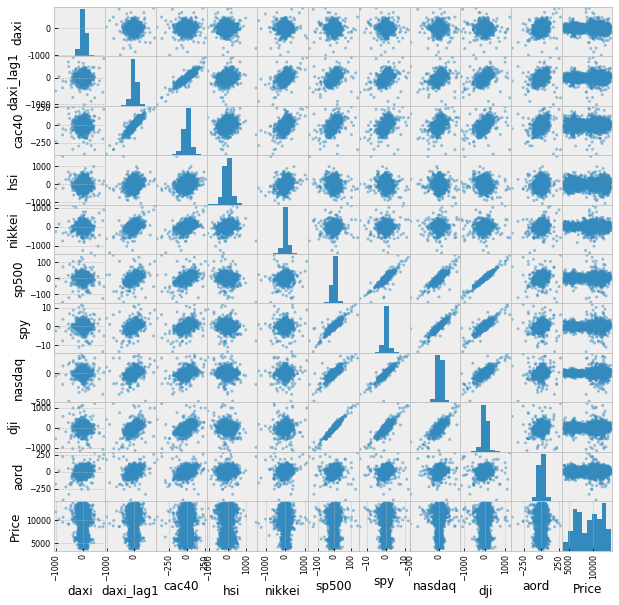

In [95]:
#data exploration
data_exp_diag1=scatter_matrix(all_indice,figsize=(10,10))

In [96]:
data_exp_corr=all_indice.iloc[:,:-1].corr()['daxi']
data_exp_corr

daxi         1.000000
daxi_lag1    0.001690
cac40        0.007467
hsi          0.016679
nikkei       0.019207
sp500       -0.021745
spy         -0.040845
nasdaq      -0.016973
dji         -0.026698
aord         0.294681
Name: daxi, dtype: float64

In [97]:
#train/test split(60:40)
train=all_indice.iloc[:1718,:]
test=all_indice.iloc[1718:,:]
pc_test=len(test)/len(all_indice)
pc_test
#is 60:40 appropriate since stock prices contain a lot of noise?

0.40034904013961603

In [98]:
#regression model
eq='daxi~daxi_lag1+cac40+hsi+nikkei+sp500+spy+nasdaq+dji+Price+aord'
reg_model=smf.ols(formula=eq,data=train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   daxi   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     12.87
Date:                Mon, 11 May 2020   Prob (F-statistic):           6.48e-22
Time:                        16:33:08   Log-Likelihood:                -10228.
No. Observations:                1718   AIC:                         2.048e+04
Df Residuals:                    1707   BIC:                         2.054e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0539      9.038      1.223      0.221      -6.673      28.781
daxi_lag1     -0.0130      0.051     -0.255      0.799      -0.113       0.087
cac40         -0.0706      0.101     -0.700      0.484      -0.268       0.127
hsi            0.0313      0.013      2.442      0.015       0.006       0.057
nikkei        -0.0388      0.020     -1.973      0.049      -0.077      -0.000
sp500          0.7529      0.864      0.871      0.384      -0.942       2.448
spy           -5.0627      6.529     -0.775      0.438     -17.868       7.742
nasdaq         0.0606      0.224      0.270      0.787      -0.380       0.501
dji           -0.1329      0.085     -1.561      0.119      -0.300       0.034
Price         -0.0011      0.001     -0.919      0.358      -0.003       0.001
aord           0.6434      0.064      9.999      0.000       0.517       0.770
==============================================================================
Omnibus:                      119.033   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              402.737
Skew:                          -0.284   Prob(JB):                     3.52e-88
Kurtosis:                       5.303   Cond. No.                     3.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


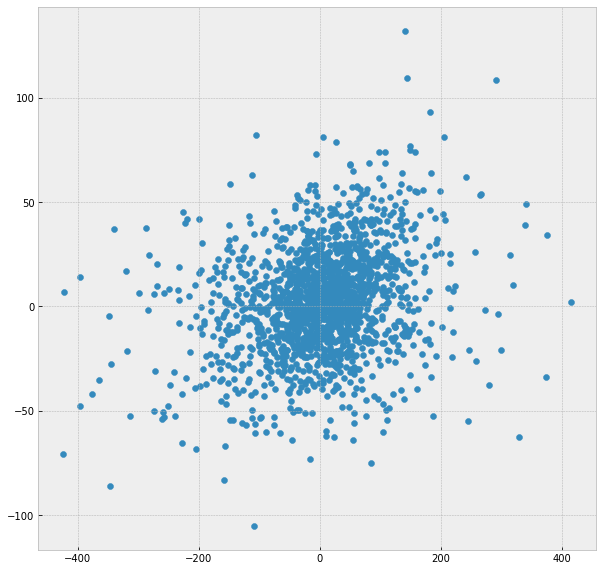

In [102]:
#making prediction with regression model
train['predictedY']=reg_model.predict(train)
test['predictedY']=reg_model.predict(test)
plt.figure(figsize=(10,10))
plt.scatter(train['daxi'],train['predictedY'])
plt.show()

C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


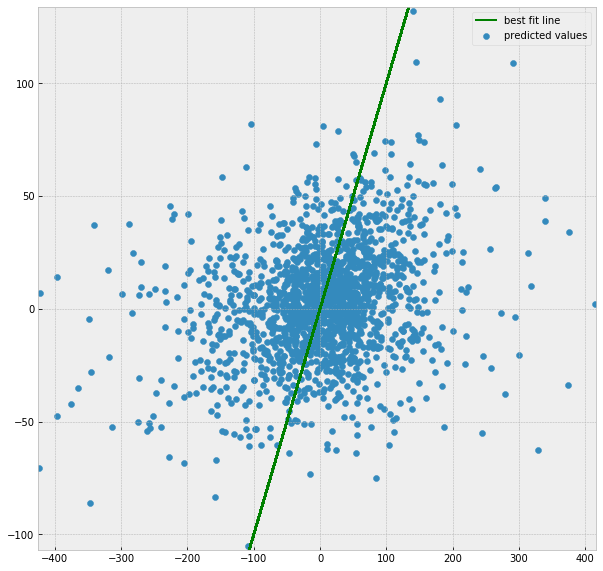

In [108]:
#for constructing best fit line
m_predict=smf.ols(formula='daxi~predictedY',data=train).fit()
b0=m_predict.params[0]
b1=m_predict.params[1]
plt.figure(figsize=(10,10))
plt.scatter(train['daxi'],train['predictedY'],label='predicted values')
train['predictedY2']=b0+b1*train['daxi']
plt.plot(train['daxi'],train['predictedY2'],color='g',label='best fit line')
plt.xlim(train['daxi'].min()-2,train['daxi'].max()+2)
plt.ylim(train['predictedY'].min()-2,train['predictedY'].max()+2)
plt.legend()
plt.show()

In [109]:
m_predict.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   daxi   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     129.4
Date:                Mon, 11 May 2020   Prob (F-statistic):           5.86e-29
Time:                        17:28:25   Log-Likelihood:                -10228.
No. Observations:                1718   AIC:                         2.046e+04
Df Residuals:                    1716   BIC:                         2.047e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.879e-14      2.264  -2.16e-14      1.000      -4.440       4.440
predictedY     1.0000      0.088     11.376      0.000       0.828       1.172
==============================================================================
Omnibus:                      119.033   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              402.737
Skew:                          -0.284   Prob(JB):                     3.52e-88
Kurtosis:                       5.303   Cond. No.                         25.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
# RMSE - Root Mean Squared Error, Adjusted R^2
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE

In [122]:
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

In [129]:
assessTable(test, train, reg_model, 9, 'daxi')

,Train,Test
R2,0.065223,0.070073
RMSE,93.435345,130.892575


In [127]:
test=test[['daxi','daxi_lag1','cac40','hsi','nikkei','sp500','spy','nasdaq','dji','aord','Price','predictedY']]
train=train[['daxi','daxi_lag1','cac40','hsi','nikkei','sp500','spy','nasdaq','dji','aord','Price','predictedY']]

In [131]:
#trading strategy and evaluation
#first remove yhat
test=test[['daxi','daxi_lag1','cac40','hsi','nikkei','sp500','spy','nasdaq','dji','aord','Price','predictedY']]
train=train[['daxi','daxi_lag1','cac40','hsi','nikkei','sp500','spy','nasdaq','dji','aord','Price','predictedY']]

In [136]:
#profit of signal
train['Order']=[1 if sig>0 else -1 for sig in train['predictedY']]
train['Profit']=train['Order']*train['daxi']
train['CumProfit']=train['Profit'].cumsum()
test['Order']=[1 if sig>0 else -1 for sig in test['predictedY']]
test['Profit']=test['Order']*test['daxi']
test['CumProfit']=test['Profit'].cumsum()

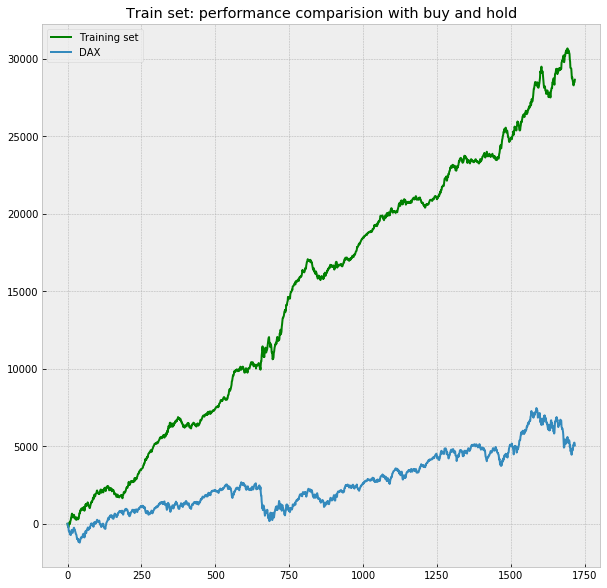

Profit through buy and hold strategy in training data is 28640.6083984375


In [142]:
#train performance comparision with buy and hold
plt.figure(figsize=(10,10))
plt.title('Train set: performance comparision with buy and hold')
plt.plot(train['CumProfit'].values,color='g',label='Training set')
plt.plot(train['daxi'].cumsum().values,label='DAX')
plt.legend()
plt.show()
print('Profit through buy and hold strategy in training data is {}'.format(train['Profit'].sum()))

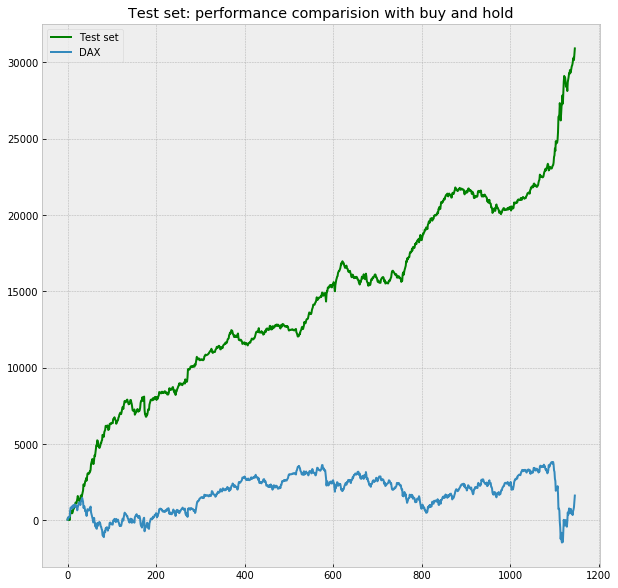

Profit through buy and hold strategy in testing data is 30921.46484375


In [150]:
#test performance
plt.figure(figsize=(10,10))
plt.title('Test set: performance comparision with buy and hold')
plt.plot(test['CumProfit'].values,color='g',label='Test set')
plt.plot(test['daxi'].cumsum().values,label='DAX')
plt.legend()
plt.show()
print('Profit through buy and hold strategy in testing data is {}'.format(test['Profit'].sum()))

In [155]:
#Evaluation-Sharpe & maximum drawdown
train['Amount']=train['CumProfit']+train.loc[train.index[0],'Price']
test['Amount']=test['CumProfit']+test.loc[test.index[0],'Price']

In [182]:
def sharpe(daily_mean,daily_std):
    ratio=daily_mean/daily_std
    yearly=(252)**0.5*ratio
    return ratio,yearly,print('Daily Sharpe Ratio: {} \nYearly Sharpe Ratio: {} '.format(ratio,yearly))

In [188]:
train_daily_return=(np.log(train['Amount'])-np.log(train['Amount']).shift(1)).dropna()
train_std=train_daily_return.std(ddof=1)
test_daily_return=(np.log(test['Amount'])-np.log(test['Amount']).shift(1)).dropna()
test_std=test_daily_return.std(ddof=1)

In [189]:
train_daily_return_mean=train_daily_return.mean()
test_daily_return_mean=test_daily_return.mean()

In [186]:
#train_sharpe
sharpe(train_daily_return_mean,train_std)

Daily Sharpe Ratio: 0.17194699785348497 
Yearly Sharpe Ratio: 2.7295739700268693 


(0.17194699785348497, 2.7295739700268693, None)

In [190]:
#test_sharpe
sharpe(test_daily_return_mean,test_std)

Daily Sharpe Ratio: 0.20634243828832002 
Yearly Sharpe Ratio: 3.2755846597775227 


(0.20634243828832002, 3.2755846597775227, None)

In [191]:
#Maximum drawdown-train set
train['Peak']=train['Amount'].cummax()
train['Drawdown']=(train['Peak']-train['Amount'])/train['Peak']
train['Drawdown'].max()

0.10775053256794903

In [192]:
test['Peak']=test['Amount'].cummax()
test['Drawdown']=(test['Peak']-test['Amount'])/test['Peak']
test['Drawdown'].max()

0.07319328331291998